In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [32]:
tennis_data = read_csv("data/atp2017-2019-1.csv") %>%
    select(tourney_level, winner_ht, loser_ht, winner_age, loser_age, minutes) %>%
    na.omit()

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



In [33]:
tennis_split = initial_split(tennis_data, prop = .75, strata = tourney_level)  
tennis_train = training(tennis_split)   
tennis_test = testing(tennis_split)

In [40]:
tennis_summary_num = tennis_train %>%
    group_by(tourney_level) %>%
    summarize(n = n())
tennis_summary_num

`summarise()` ungrouping output (override with `.groups` argument)



tourney_level,n
<chr>,<int>
A,1099
D,61
F,20
G,450
M,519


In [41]:
tennis_summary_length = tennis_train %>%
    group_by(tourney_level) %>%
    summarize(average_length = mean(minutes))
tennis_summary_length

`summarise()` ungrouping output (override with `.groups` argument)



tourney_level,average_length
<chr>,<dbl>
A,100.0246
D,143.9508
F,92.2500
G,149.3044
M,102.1869


In [42]:
tennis_summary_height = tennis_train %>%
    group_by(tourney_level) %>%
    summarize(average_height = mean((winner_ht + loser_ht)/2))
tennis_summary_height

`summarise()` ungrouping output (override with `.groups` argument)



tourney_level,average_height
<chr>,<dbl>
A,186.1570
D,184.4918
F,189.2250
G,186.8956
M,186.9846


In [43]:
tennis_summary_age = tennis_train %>%
    group_by(tourney_level) %>%
    summarize(average_age = mean((winner_age + loser_age)/2))
tennis_summary_age

`summarise()` ungrouping output (override with `.groups` argument)



tourney_level,average_age
<chr>,<dbl>
A,29.84081
D,29.14245
F,29.38330
G,29.87444
M,29.57757


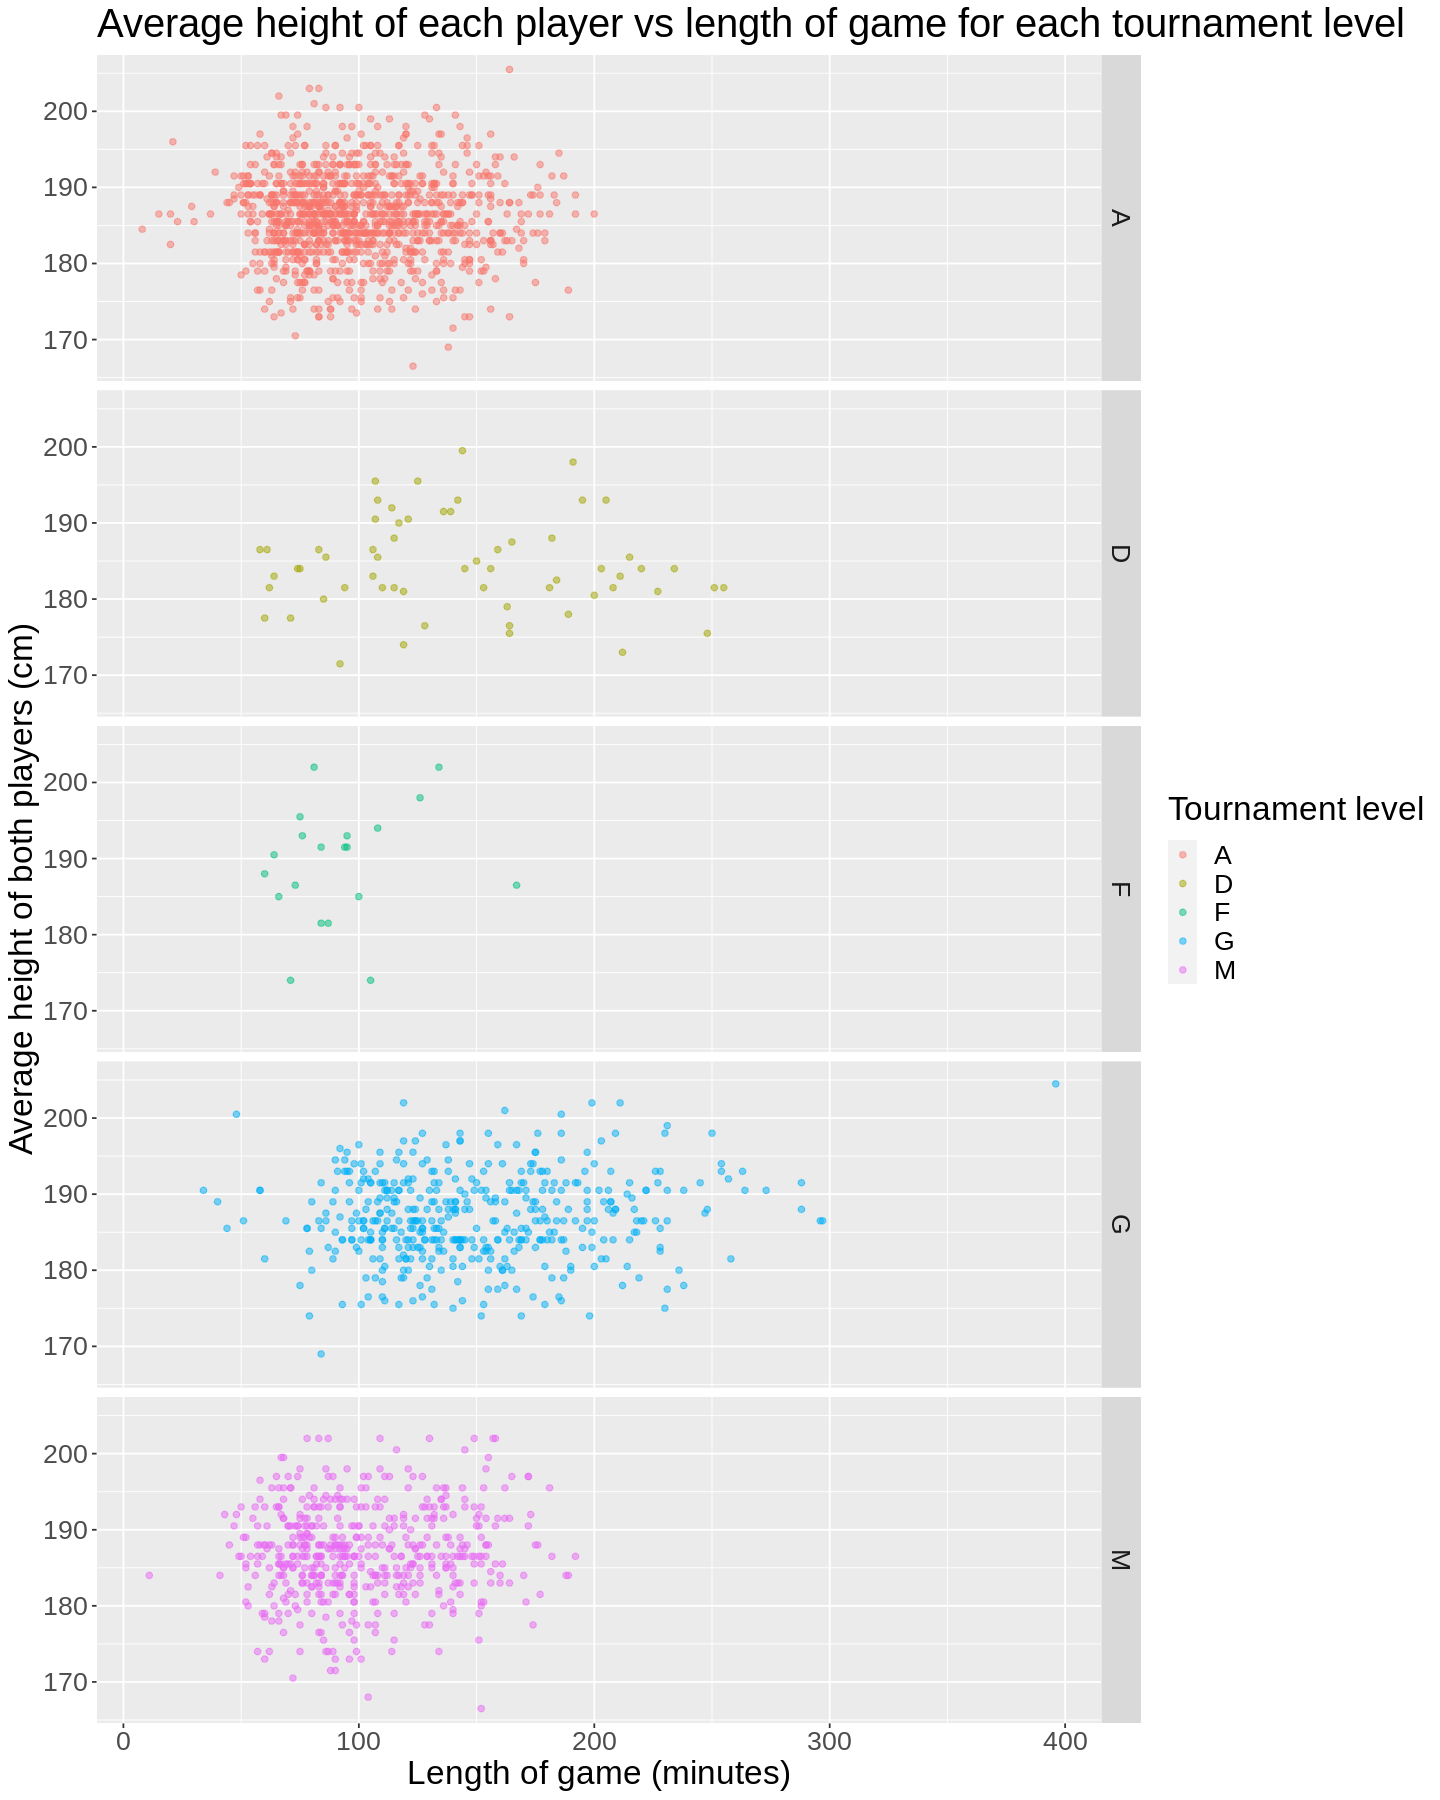

In [68]:
options(repr.plot.width = 12, repr.plot.height = 15)

tennis_plot_height = tennis_train %>%
    ggplot(aes(x = minutes, 
               y = (winner_ht + loser_ht)/2, 
               colour = tourney_level)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Length of game (minutes)",
         y = "Average height of both players (cm)",
         colour = "Tournament level",
         title = "Average height of each player vs length of game for each tournament level") +
    facet_grid(tourney_level ~ .) +
    theme(text = element_text(size = 20))

tennis_plot_height

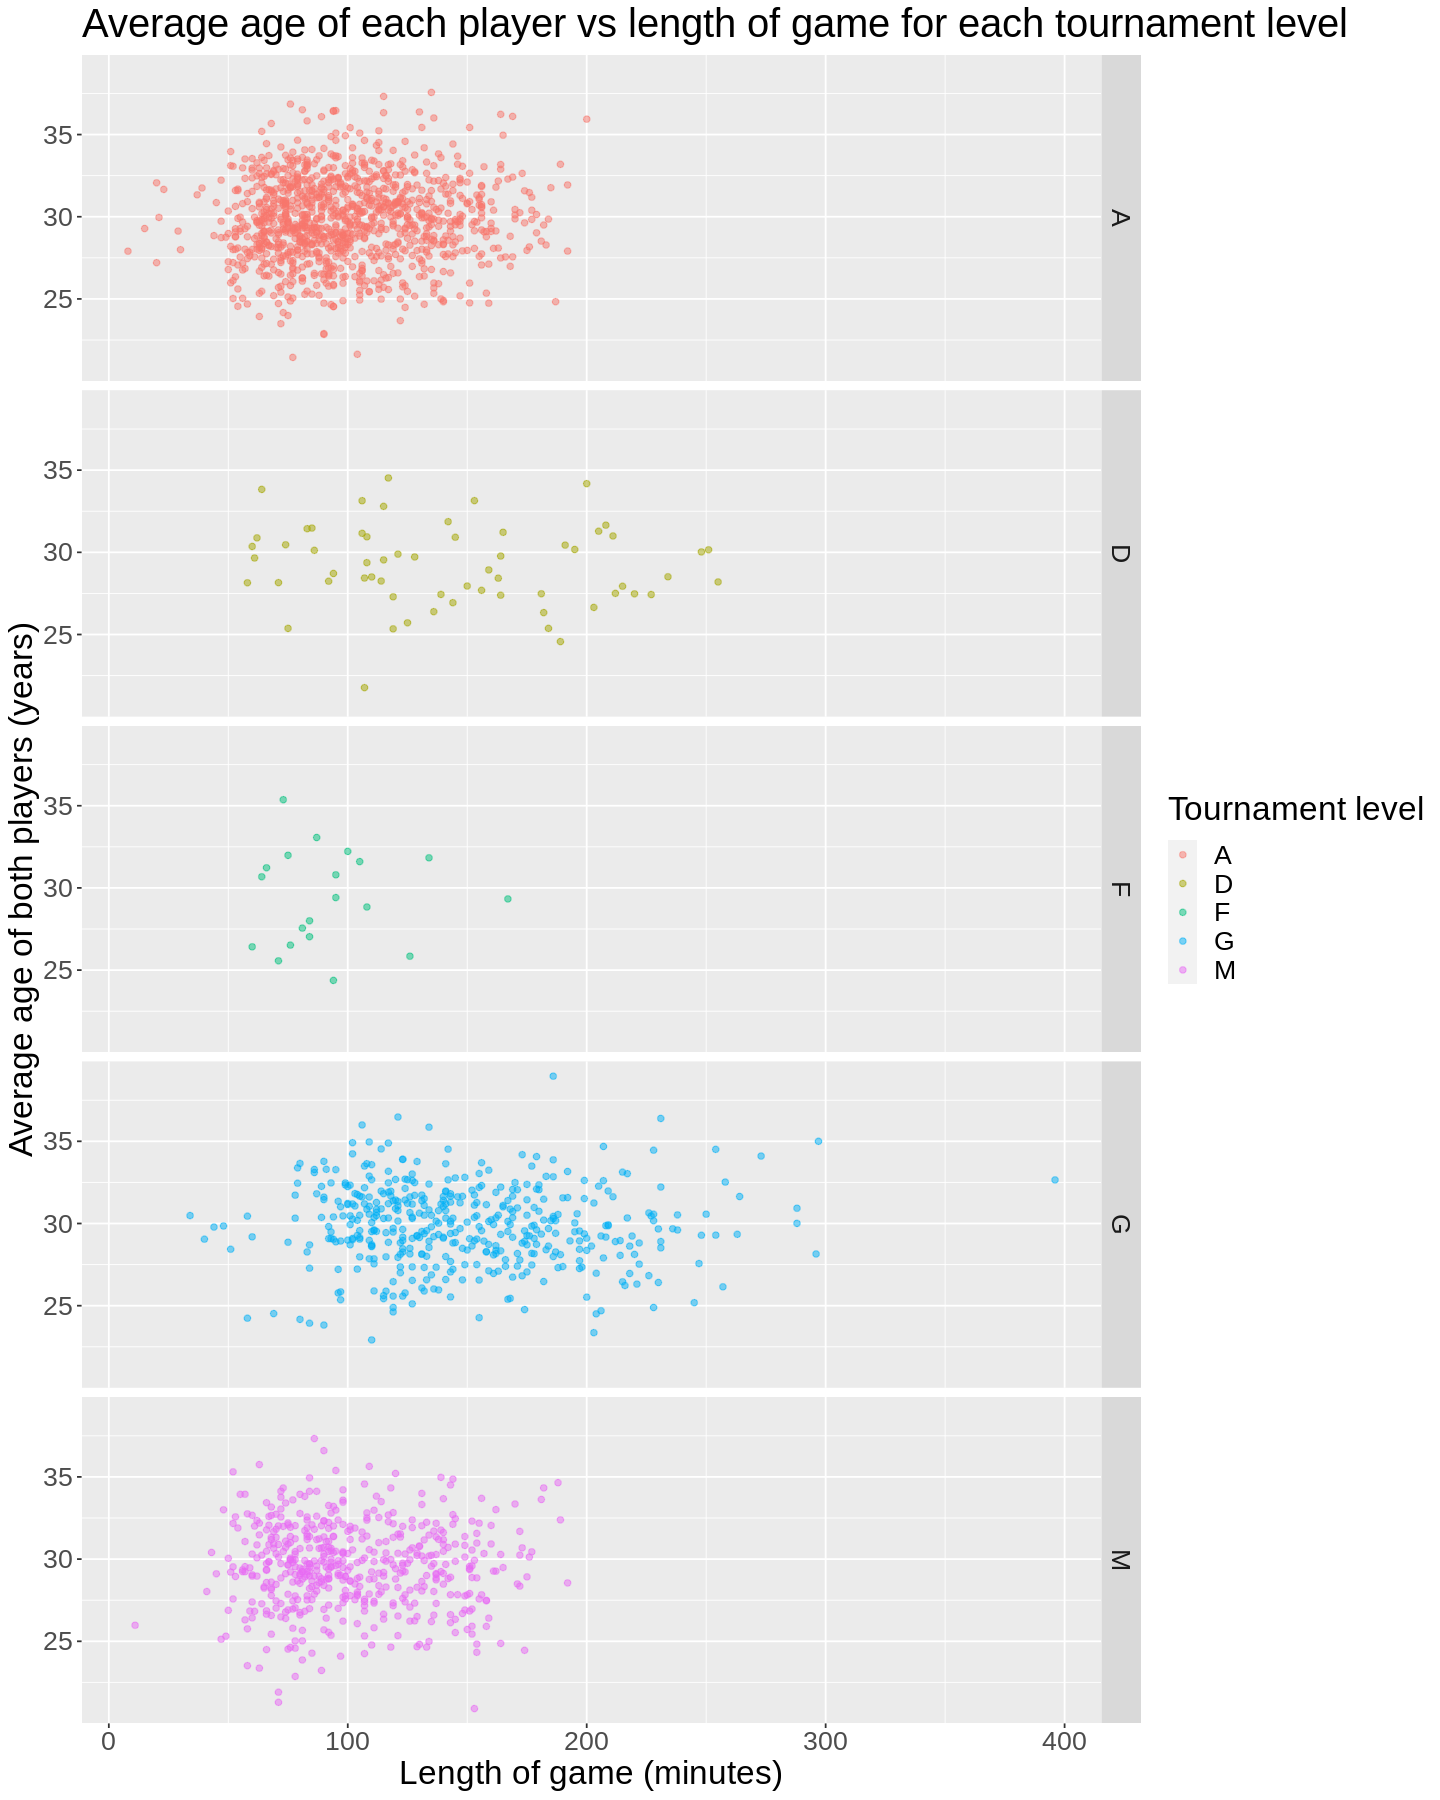

In [70]:
options(repr.plot.width = 12, repr.plot.height = 15)

tennis_plot_age = tennis_train %>%
    ggplot(aes(x = minutes, 
               y = (winner_age + loser_age)/2, 
               colour = tourney_level)) +
    geom_point(alpha = 0.5) + 
    labs(x = "Length of game (minutes)",
         y = "Average age of both players (years)",
         colour = "Tournament level",
         title = "Average age of each player vs length of game for each tournament level") +
    facet_grid(tourney_level ~ .) +
    theme(text = element_text(size = 20))

tennis_plot_age